<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.328430  27.452828  44.862950  ...  179.413847  180.431814 -1.017966
      1.0    75.643252  30.785884  75.232337  ...  191.760353  191.573811  0.186542
      2.0    89.052622  66.096637  74.705056  ...  238.879931  239.465381 -0.585450
      3.0    47.644629  56.391165  78.416916  ...  192.064152  192.373377 -0.309224
      4.0    77.730555  44.872873  33.884470  ...  166.059945  166.286157 -0.226211
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   79.205923  54.773130  88.973740  ...  231.761126  232.786825 -1.025699
      16.0   90.474790  24.527720  42.131852  ...  169.280768  167.412745  1.868023
      17.0   65.837729  50.389950  77.661620  ...  203.479605  203.987716 -0.508111
      18.0   23.949956  93.827813  30.584189  ...  158.408354  159.040560 -0.632206
      19.0   22.218238  98.078806  50.979309  ...  182.730794  181.780649  0.950145

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.328430  27.452828  44.862950  ...  179.413847  180.431814 -1.017966
      1.0    75.643252  30.785884  75.232337  ...  191.760353  191.573811  0.186542
      2.0    89.052622  66.096637  74.705056  ...  238.879931  239.465381 -0.585450
      3.0    47.644629  56.391165  78.416916  ...  192.064152  192.373377 -0.309224
      4.0    77.730555  44.872873  33.884470  ...  166.059945  166.286157 -0.226211
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   79.205923  54.773130  88.973740  ...  231.761126  232.786825 -1.025699
      16.0   90.474790  24.527720  42.131852  ...  169.280768  167.412745  1.868023
      17.0   65.837729  50.389950  77.661620  ...  203.479605  203.987716 -0.508111
      18.0   23.949956  93.827813  30.584189  ...  158.408354  159.040560 -0.632206
      19.0   22.218238  98.078806  50.979309  ...  182.730794  181.780649  0.950145

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.328430  27.452828  44.862950  ...  179.413847  180.431814 -1.017966
      1.0    75.643252  30.785884  75.232337  ...  191.760353  191.573811  0.186542
      2.0    89.052622  66.096637  74.705056  ...  238.879931  239.465381 -0.585450
      3.0    47.644629  56.391165  78.416916  ...  192.064152  192.373377 -0.309224
      4.0    77.730555  44.872873  33.884470  ...  166.059945  166.286157 -0.226211
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   79.205923  54.773130  88.973740  ...  231.761126  232.786825 -1.025699
      16.0   90.474790  24.527720  42.131852  ...  169.280768  167.412745  1.868023
      17.0   65.837729  50.389950  77.661620  ...  203.479605  203.987716 -0.508111
      18.0   23.949956  93.827813  30.584189  ...  158.408354  159.040560 -0.632206
      19.0   22.218238  98.078806  50.979309  ...  182.730794  181.780649  0.950145

[20000 rows x 7 columns]

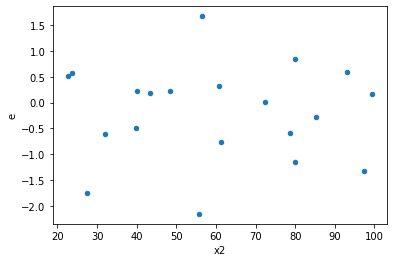

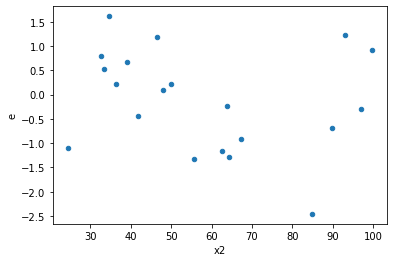

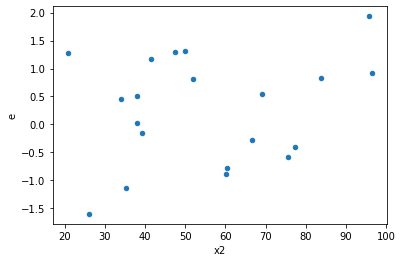

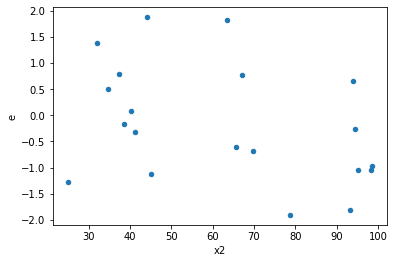

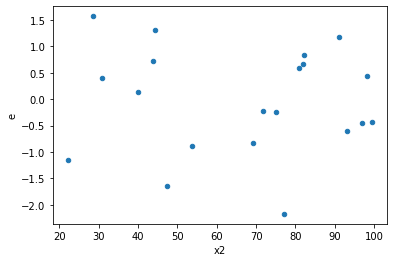

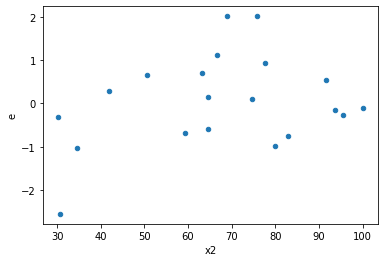

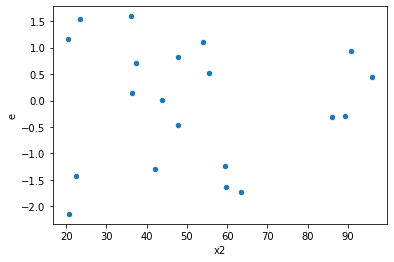

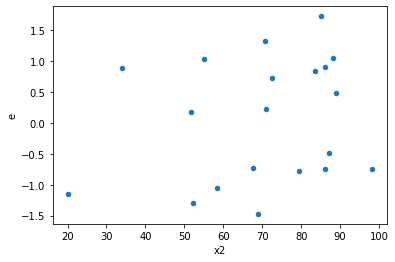

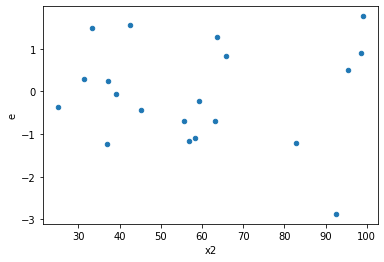

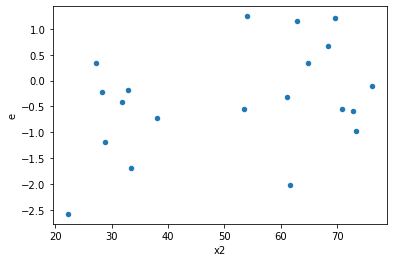

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,5.995379123899929,4.612536113876755,1.4988447809749823,1.1531340284691887,1.2998010152945814,0.780570346678549,0.6097148266607255,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,7.255703317029297,1.8304806784798557,1.8139258292573242,0.45762016961996393,3.9638240394074415,0.15692148986174503,0.9215392550691275,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,2.0219929405204256,1.1637786491934428,0.5054982351301064,0.2909446622983607,1.7374377351928294,0.5590819028297624,0.7204590485851188,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,5.442160965987498,0.6152753219757939,1.3605402414968746,0.15381883049394848,8.845082472203563,0.031915580423224066,0.984042209788388,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,7.344245423448026,1.3751552599613788,1.8360613558620065,0.3437888149903447,5.34066635039762,0.08975633790756321,0.9551218310462184,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,3.447102035495207,3.4202816388944273,0.8617755088738017,0.8550704097236068,1.0078415754702146,0.9933699099499771,0.5033150450250115,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,7.051996470541028,1.2867719276675218,1.762999117635257,0.32169298191688045,5.480377927830529,0.08534361017797809,0.957328194911011,Reject005=1 : Homoscedasticity
13.0,5.0,5.0,3.406802223067351,2.6611287096245584,0.8517005557668378,0.6652821774061396,1.2802094880814672,0.7929511707378922,0.6035244146310539,Reject005=1 : Homoscedasticity
18.0,5.0,5.0,5.7928952932800435,1.1898422796120582,1.4482238233200109,0.29746056990301456,4.868624516493721,0.10725550159155373,0.9463722492042231,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,5.995379123899929,4.612536113876755,1.4988447809749823,1.1531340284691887,1.2998010152945814,1.219429653321451,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,7.255703317029297,1.8304806784798557,1.8139258292573242,0.45762016961996393,3.9638240394074415,0.15692148986174503,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,2.0219929405204256,1.1637786491934428,0.5054982351301064,0.2909446622983607,1.7374377351928294,1.4409180971702376,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,5.442160965987498,0.6152753219757939,1.3605402414968746,0.15381883049394848,8.845082472203563,0.031915580423224066,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,2.2022751897237205,2.9172908813462377,0.5505687974309301,0.7293227203365594,0.7549042174044159,0.7652057869929048,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,5.488671430798195,8.287198071182274,1.3721678576995489,2.0717995177955686,0.6623072579723156,0.6621988937984448,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,7.344245423448026,1.3751552599613788,1.8360613558620065,0.3437888149903447,5.34066635039762,0.08975633790756321,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.07561452331221759,1.8921979607003796,0.018903630828054397,0.4730494901750949,0.039961211713931646,0.003016227475064171,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,3.447102035495207,3.4202816388944273,0.8617755088738017,0.8550704097236068,1.0078415754702146,1.006630090050023,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      912
Reject005=0 : Heteroscedasticity     88
Name: Result_test, dtype: int64